In [12]:
# imports
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")

In [23]:
def load_data(file_path):
    """
    Load data from a CSV file.
    
    Parameters:
    - file_path: str, path to the CSV file.
    
    Returns:
    - pandas DataFrame, the loaded data.
    """
    return pd.read_csv(file_path)
    
def check_is_numeric(data):
    """
    Checks if the columns (excluding 'time') are numeric.

    Parameters:
    - data : pandas dataframe
    
    Returns:
    Boolean variable(True/ False) and prints the non-numeric columns.
    """
    flag = 0
    non_numeric_cols = []
    for column in data.columns:
        if column.lower() == 'time':  # Skip the 'time' column
            continue
        if not is_numeric_dtype(data[column]):
            flag += 1
            non_numeric_cols.append(column)
    if flag != 0:
        print(f'Please Provide Numeric Data.\nNon-numeric Attributes are- {non_numeric_cols}')
        return False
    return True
        
def plot_single_time_series(data):
    """
    Plot a single time series.
    
    Parameters:
    - data: pandas DataFrame, must contain 'time' and 'y' columns.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(data['time'], data['y'], label='Stand 3-4 Tension Reference', color='blue')
    plt.xlabel('Time')
    plt.ylabel('Values')
    # plt.title('Single Time Series Plot')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Driver code for user to run

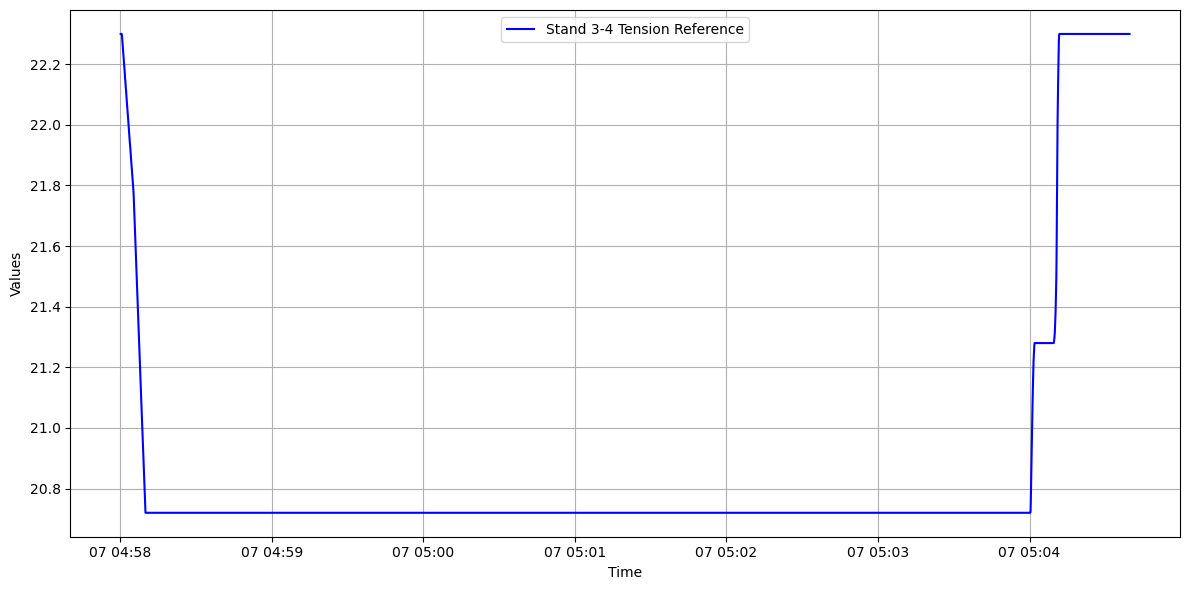

In [24]:
def main():
    try:
        file_path = r"D:\Stelco\Work\Dynamic Correlation\Key\Master whole Phase\5508568.csv"

        data = pd.read_csv(file_path,usecols=['Time','Stand 3-4 Tension Reference'])
        # data = pd.read_csv(file_path,usecols=['Time','Operator_Q_VW_OLD_OPTECH'])

        data['Time'] = pd.to_datetime(data['Time'], errors='coerce')
        # data2['Time'] = pd.to_datetime(data2['Time'], errors='coerce')

        if len(data.columns) != 2:
            print('The file must contain exactly 2 columns: time and value.')
            return

        # Rename columns for consistency
        data.rename(columns={data.columns[0]: 'time', data.columns[1]: 'y'}, inplace=True)

        # Check numeric
        if not check_is_numeric(data[['y']]):
            return

        # Handle missing values in 'y'
        imputer = KNNImputer(n_neighbors=5)
        data[['y']] = imputer.fit_transform(data[['y']])

        # Plot
        plot_single_time_series(data)

    except Exception as e:
        print("Error:", e)

if __name__ == "__main__":
    main()